In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


<h2>1. Data ARE-Historical-Data-final

In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df1 = pd.read_csv('ARE-Historical-Data-final.csv')
df1 = df1[['Price']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[107.45810345 107.42555331 107.39300318 107.36045304 107.32790291
 107.29535277 107.26280264 107.2302525  107.19770237 107.16515223
 107.1326021  107.10005196 107.06750183 107.03495169 107.00240156
 106.96985142 106.93730129 106.90475115 106.87220102 106.83965088
 106.80710075 106.77455061 106.74200048 106.70945034 106.67690021
 106.64435008 106.61179994 106.57924981 106.54669967 106.51414954]


In [6]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 19.008868058982188
Testing RMSE: 20.506362062099083
Testing MAE: 18.381199248126062
Validation MAE: 18.264345742351335
Testing MAPE: 19.341621294691773
Validation MAPE: 19.95406647765016


Validation RMSE: 19.008868058982188
Testing RMSE: 20.506362062099083


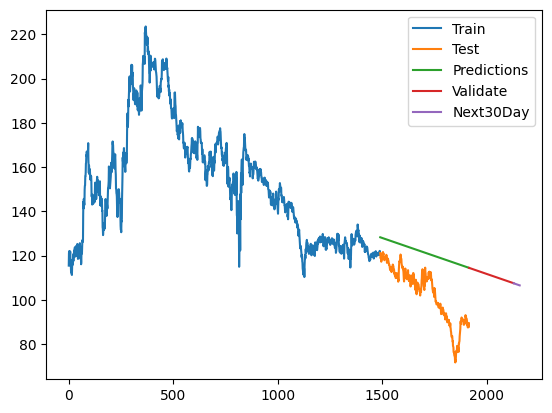

In [7]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

<h2>2. Data ARI-Historical-Data-final

In [8]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df2 = pd.read_csv('ARI-Historical-Data-final.csv')
df2 = df2[['Price']]
df2 = df2.dropna() # Drop missing values
df2 = df2.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size]
val_data = df2[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[23.4645793  23.47083111 23.47708293 23.48333475 23.48958656 23.49583838
 23.5020902  23.50834201 23.51459383 23.52084564 23.52709746 23.53334928
 23.53960109 23.54585291 23.55210473 23.55835654 23.56460836 23.57086017
 23.57711199 23.58336381 23.58961562 23.59586744 23.60211926 23.60837107
 23.61462289 23.62087471 23.62712652 23.63337834 23.63963015 23.64588197]


In [12]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 5.961428872911563
Testing RMSE: 4.1128642204334565
Testing MAE: 3.756371374038915
Validation MAE: 5.943116518944959
Testing MAPE: 22.68004896766435
Validation MAPE: 35.329299417428686


Validation RMSE: 5.961428872911563
Testing RMSE: 4.1128642204334565


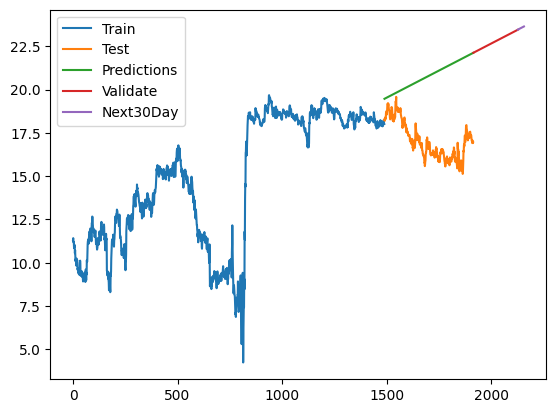

In [13]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

<h2>2. Data MAA-Historical-Data-final

In [14]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df3 = pd.read_csv('ARE-Historical-Data-final.csv')
df3 = df3[['Price']]
df3 = df3.dropna() # Drop missing values
df3 = df3.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df3))
test_size = int(0.2 * len(df3))
val_size = len(df3) - train_size - test_size

train_data = df3[:train_size]
test_data = df3[train_size:train_size+test_size]
val_data = df3[train_size+test_size:]

In [15]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [17]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[107.45810345 107.42555331 107.39300318 107.36045304 107.32790291
 107.29535277 107.26280264 107.2302525  107.19770237 107.16515223
 107.1326021  107.10005196 107.06750183 107.03495169 107.00240156
 106.96985142 106.93730129 106.90475115 106.87220102 106.83965088
 106.80710075 106.77455061 106.74200048 106.70945034 106.67690021
 106.64435008 106.61179994 106.57924981 106.54669967 106.51414954]


In [18]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)



Validation RMSE: 19.008868058982188
Testing RMSE: 20.506362062099083
Testing MAE: 18.381199248126062
Validation MAE: 18.264345742351335
Testing MAPE: 19.341621294691773
Validation MAPE: 19.95406647765016


Validation RMSE: 19.008868058982188
Testing RMSE: 20.506362062099083


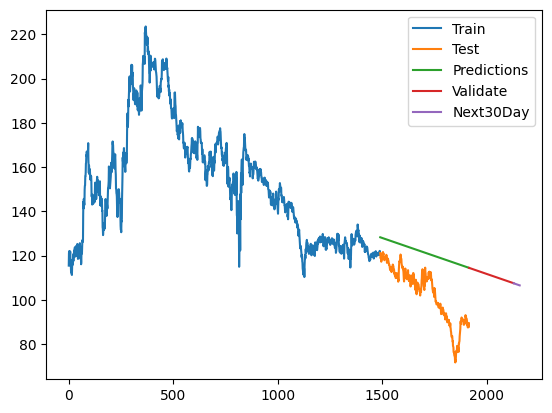

In [19]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()